# Linear Regression

## 1. Simple Linear Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df=pd.read_csv("kc_house_data.csv")
pd.set_option('display.max_columns', None) #show all columns
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0           0     0          3      7        1180   
1      7242     2.0           0     0          3      7        2170   
2     10000     1.0           0     0          3      6         770   
3      5000     1.0           0     0          5      7        1050   
4      8080     1.0           0     0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [10]:
df["bedrooms"].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [12]:
df["grade"].value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

In [13]:
df["floors"].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

/Users/macintosh/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


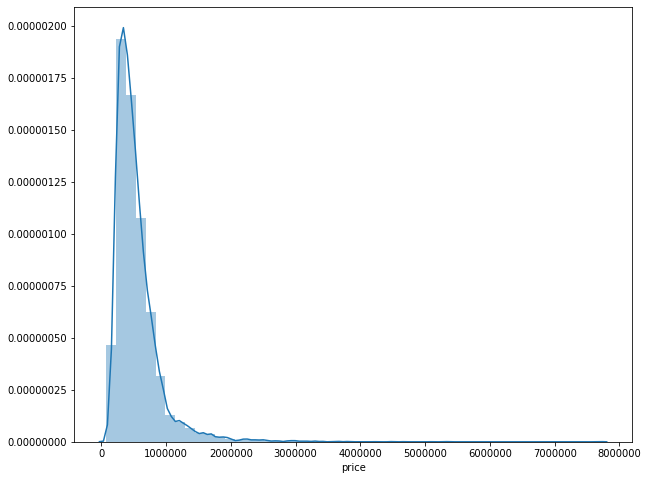

In [15]:
fig=plt.figure(figsize=(10,8))
sns.distplot(df["price"])

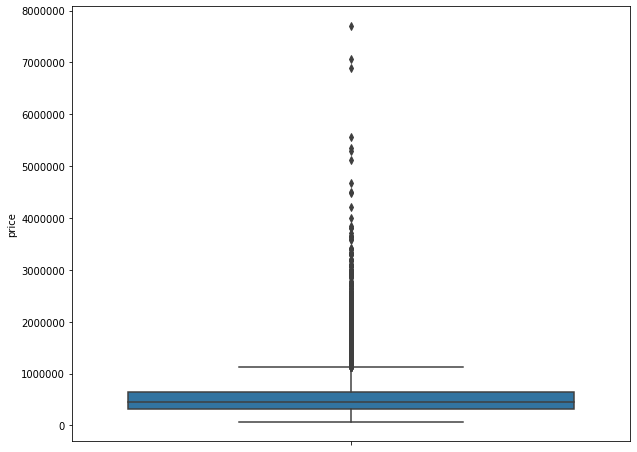

In [16]:
fig=plt.figure(figsize=(10,8))
sns.boxplot(df["price"],orient="v") #v = ventical

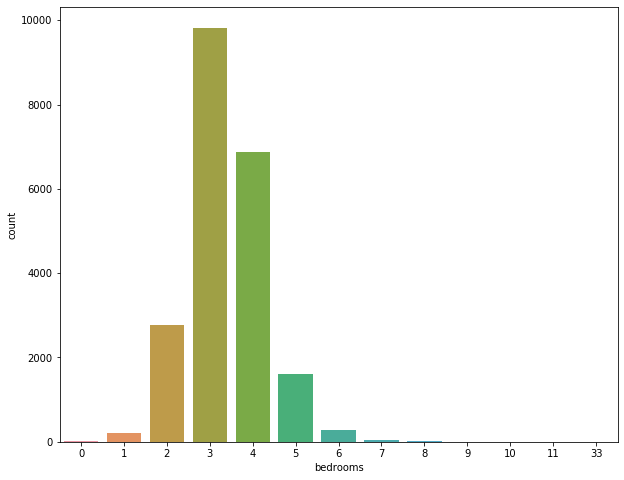

In [17]:
fig=plt.figure(figsize=(10,8))
sns.countplot(df["bedrooms"]) 

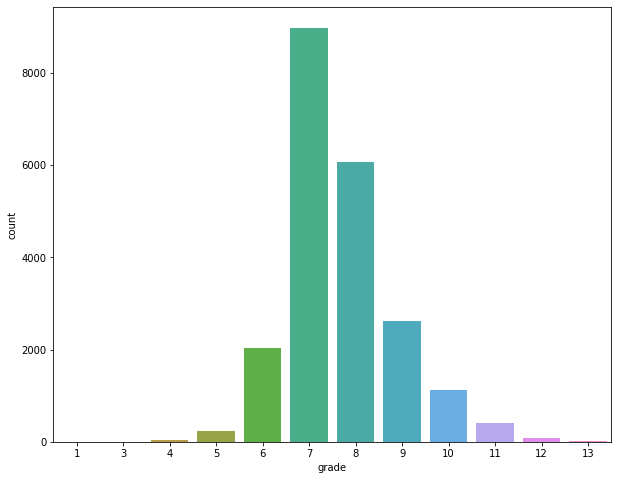

In [19]:
fig=plt.figure(figsize=(10,8))
sns.countplot(df["grade"]) 

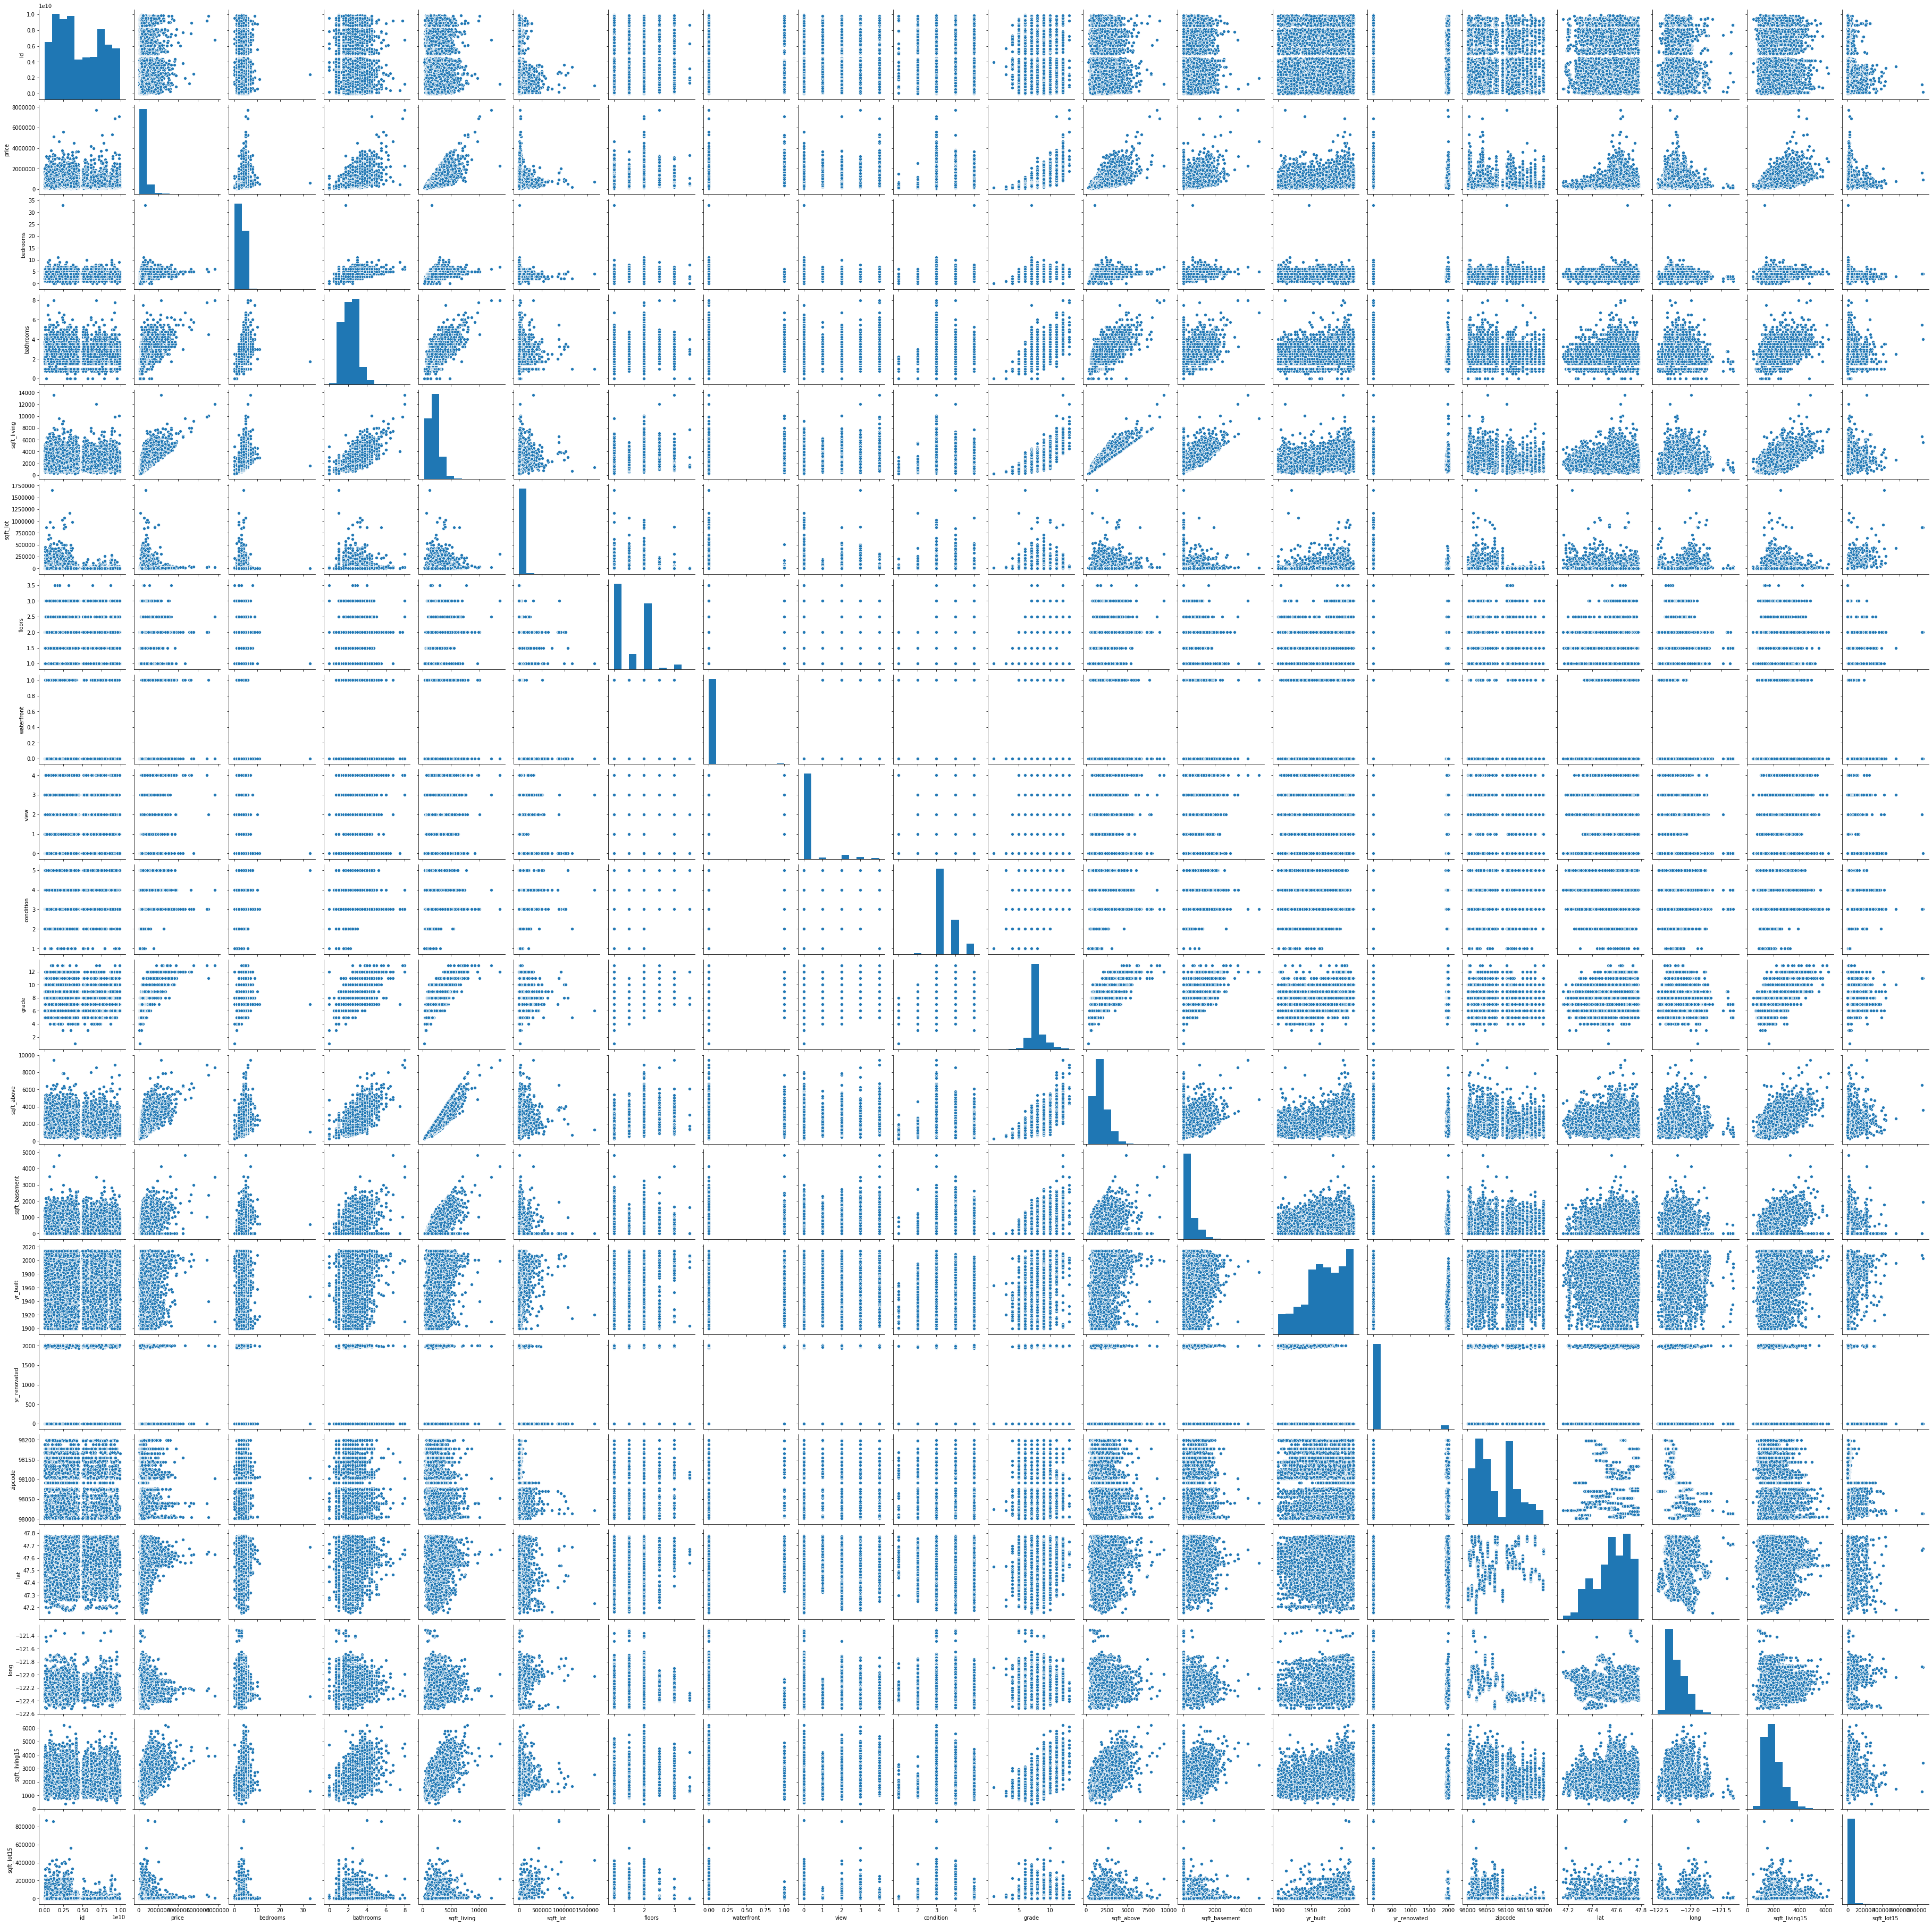

In [22]:
sns.pairplot(df)

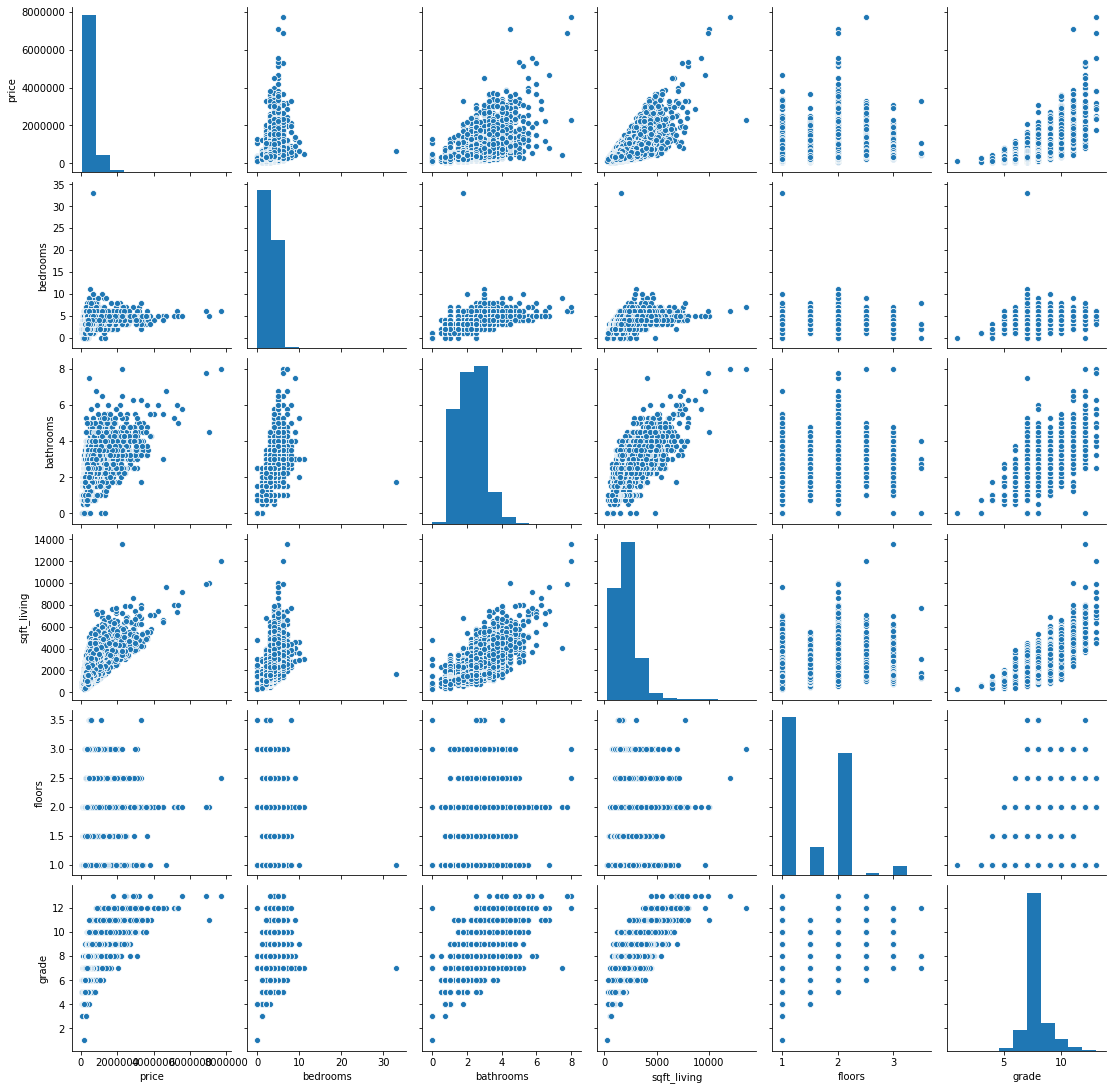

In [23]:
#เนื่องจากข้างบนมีข้อมูลที่นำมาเปรียบเทียบเยอะเกินไปเลยจำเป็นต้อง scope เฉพาะส่วนที่จะดูจริงๆ
df_corr=df[["price","bedrooms","bathrooms","sqft_living","floors","grade"]]
sns.pairplot(df_corr)

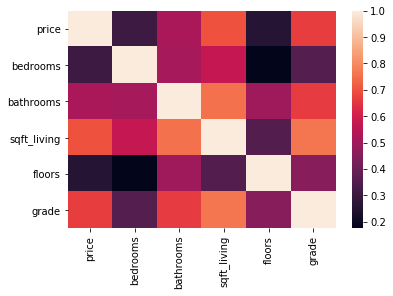

In [24]:
sns.heatmap(df_corr.corr())

### 1.1 ศึกษาความสัมพันธ์ของราคา (y) กับพื้นที่ใช้สอย (x)

/Users/macintosh/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


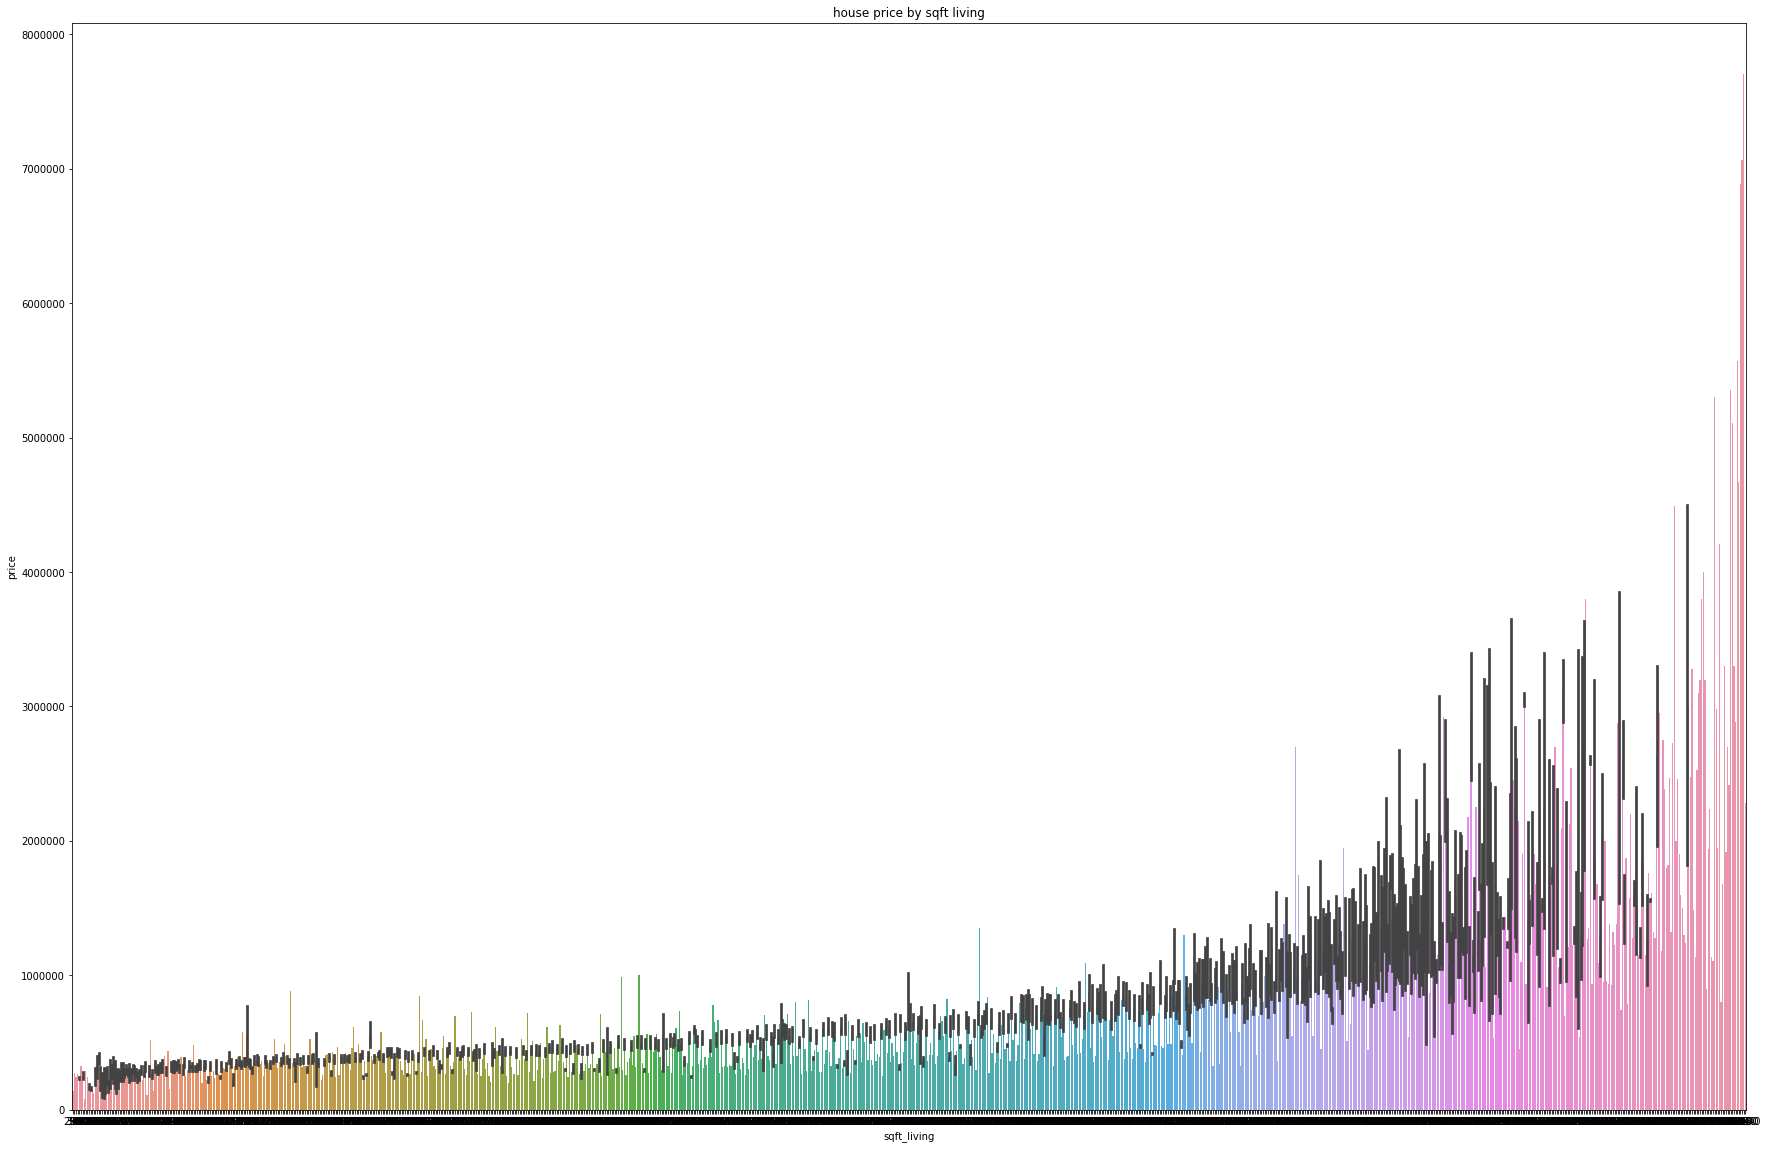

In [20]:
fig=plt.figure(figsize=(30,20))
plt.title("house price by sqft living")
plt.xlabel("sqft living")
plt.ylabel("house price")
sns.barplot(x="sqft_living",y="price",data=df)

#### ขั้นตอน 4 สร้าง model

In [25]:
#packages for modeling building and evaluation
from sklearn.model_selection import train_test_split #เครื่องมือช่วยแบ่งข้อมูล
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [70]:
x=df["sqft_living"]
y=df["price"]

In [27]:
train_test_split #use shift+tab to see the instruction

<function sklearn.model_selection._split.train_test_split(*arrays, **options)>

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [29]:
x_train #เช็คจำนวน

16000    1780
11286    1420
3201     1790
11049    1710
9716     1150
         ... 
16304    3410
79       3450
12119    2180
14147    1900
5640     1250
Name: sqft_living, Length: 17290, dtype: int64

In [30]:
x_test #เช็คจำนวน

19836    2437
10442    1560
20548    2390
11014    1480
4138     1880
         ... 
5625      880
8698     1370
9786     2130
2784     3527
9552     2910
Name: sqft_living, Length: 4323, dtype: int64

In [31]:
#we cannot use pandas directly so we have to change it to np.array form
np.array(x_train).reshape(-1,1)

array([[1780],
       [1420],
       [1790],
       ...,
       [2180],
       [1900],
       [1250]])

In [32]:
np.array(x_train).reshape(-1,1).shape

(17290, 1)

In [33]:
x_train=np.array(x_train).reshape(-1,1)

In [34]:
x_test=np.array(x_test).reshape(-1,1)

In [35]:
#start create ML model
lm =LinearRegression()
lm.fit(x_train,y_train)
#complete

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
#see the constaint received from the model
print("graph intercept: ",lm.intercept_)
print("graph coefficiency: ",lm.coef_)

graph intercept:  -42628.97651509475
graph coefficiency:  [280.68541679]


#### ขั้นตอนที่ 5 model evaluation

In [37]:
predicted=lm.predict(x_test)
predicted

array([641401.38419663, 395240.27367378, 628209.16960761, ...,
       555230.9612428 , 947348.48849527, 774165.58633724])

In [38]:
y_test

19836    285000.0
10442    239950.0
20548    460000.0
11014    397500.0
4138     545000.0
           ...   
5625     235000.0
8698     500000.0
9786     850000.0
2784     340000.0
9552     788000.0
Name: price, Length: 4323, dtype: float64

In [40]:
predicted.shape

(4323,)

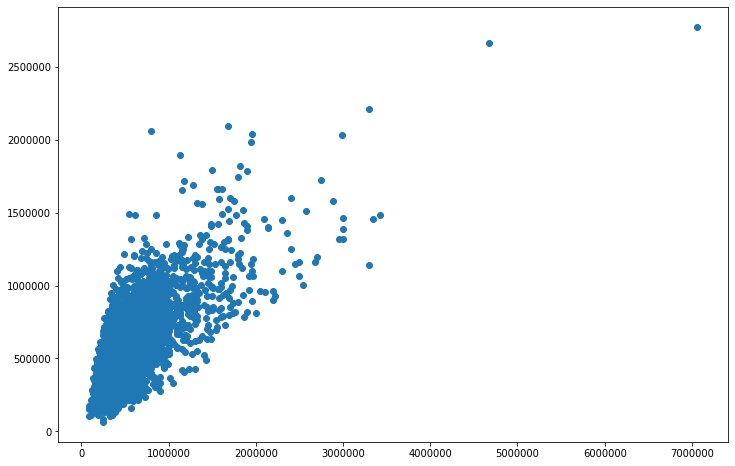

In [42]:
#compare actual value and predicted value
fig=plt.figure(figsize=(12,8))
plt.scatter(y_test,predicted)

/Users/macintosh/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


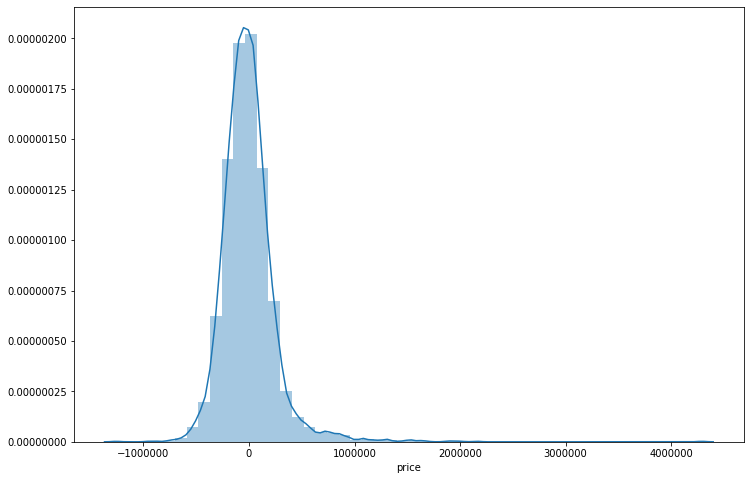

In [44]:
#check normal distribution
fig=plt.figure(figsize=(12,8))
sns.distplot(y_test-predicted,bins=50) #ผลต่างกับผลลัพธ์จริง


model นี้ทำนายได้ค่อนข้างดีเพราะ normal distribution ส่วนใหญ่อยู่ที่เลย 0

In [48]:
print("MAE: ",metrics.mean_absolute_error(y_test,predicted))
print("MSE: ",metrics.mean_squared_error(y_test,predicted))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,predicted))) #most popular

MAE:  172647.1249272275
MSE:  65286065304.1562
RMSE:  255511.37998953433


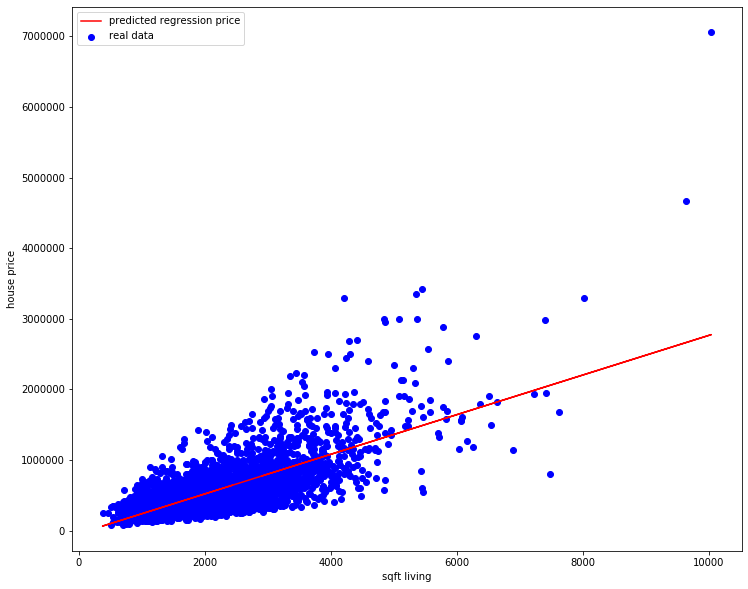

In [50]:
fig=plt.figure(figsize=(12,10))
plt.scatter(x_test,y_test,color="blue",label="real data")
plt.plot(x_test,predicted,color="red",label="predicted regression price")
plt.xlabel("sqft living")
plt.ylabel("house price")
plt.legend()

(0, 3500000)

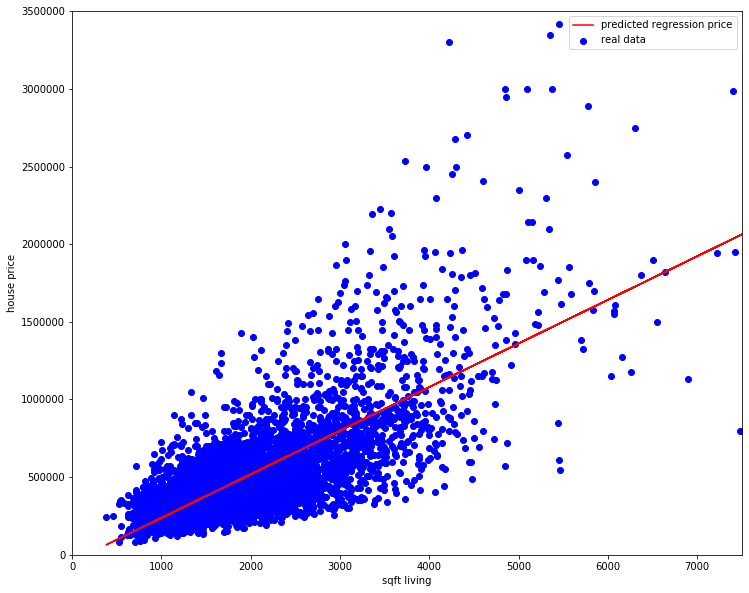

In [52]:
fig=plt.figure(figsize=(12,10))
plt.scatter(x_test,y_test,color="blue",label="real data")
plt.plot(x_test,predicted,color="red",label="predicted regression price")
plt.xlabel("sqft living")
plt.ylabel("house price")
plt.legend()
plt.xlim([0,7500])
plt.ylim([0,3500000])

In [53]:
#try to predicted out-source data
fivehundred=np.array(500).reshape(-1,1)
fivehundred

array([[500]])

In [55]:
lm.predict(fivehundred) #ผลทำนาย

array([97713.73187878])

### 1.2 ศึกษาความสัมพันธ์ของราคา (y) กับเกรดของบ้าน (x)

/Users/macintosh/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


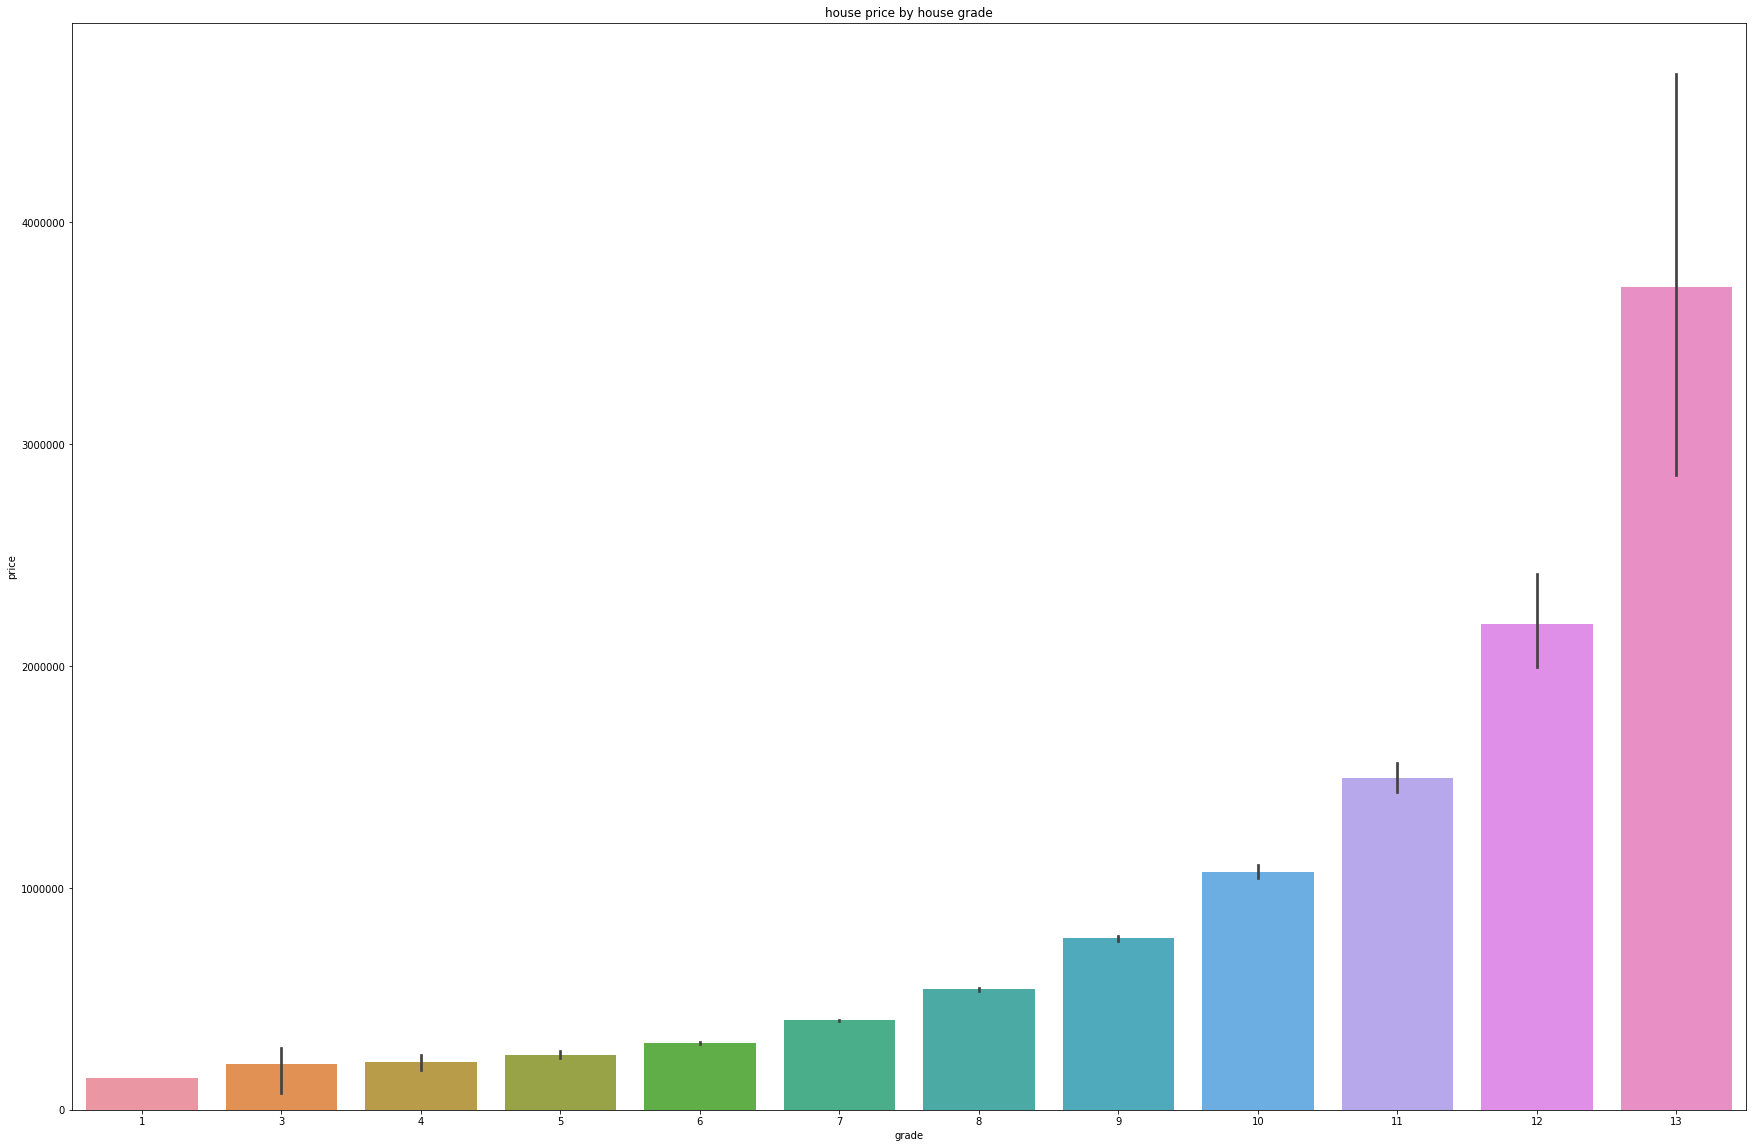

In [21]:
fig=plt.figure(figsize=(30,20))
plt.title("house price by house grade")
plt.xlabel("grade")
plt.ylabel("house price")
sns.barplot(x="grade",y="price",data=df)

In [58]:
x2=df["grade"]
y=df["price"]

In [59]:
x2_train,x2_test,y_train,y_test=train_test_split(x2,y,test_size=0.2,random_state=100)

In [60]:
x2_train=np.array(x2_train).reshape(-1,1)
x2_test=np.array(x2_test).reshape(-1,1)

In [61]:
lm2 =LinearRegression()
lm2.fit(x2_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [62]:
print("graph intercept: ",lm2.intercept_)
print("graph coefficiency: ",lm2.coef_)

graph intercept:  -1050100.9683313416
graph coefficiency:  [207663.11599711]


/Users/macintosh/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


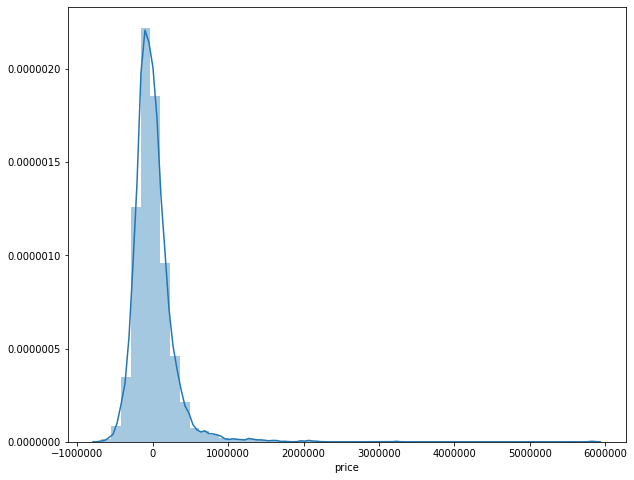

In [64]:
predicted2=lm2.predict(x2_test)
fig=plt.figure(figsize=(10,8))
sns.distplot((y_test-predicted2),bins=50)

In [65]:
print("MAE: ",metrics.mean_absolute_error(y_test,predicted2))
print("MSE: ",metrics.mean_squared_error(y_test,predicted2))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,predicted2)))

MAE:  174841.5849548054
MSE:  74824668894.49683
RMSE:  273540.9821114504


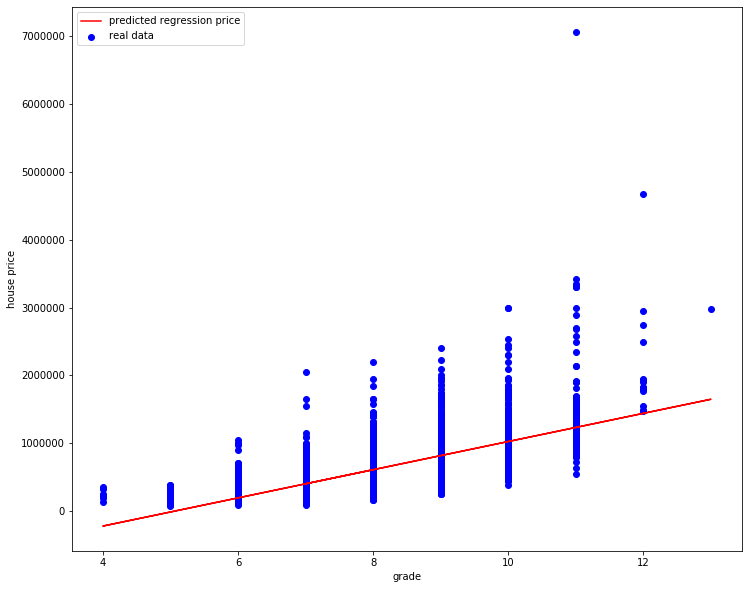

In [66]:
fig=plt.figure(figsize=(12,10))
plt.scatter(x2_test,y_test,color="blue",label="real data")
plt.plot(x2_test,predicted2,color="red",label="predicted regression price")
plt.xlabel("grade")
plt.ylabel("house price")
plt.legend()

## 2. Multiple Linear Regression

In [67]:
#packages for modeling building and evaluation
from sklearn.model_selection import train_test_split #เครื่องมือช่วยแบ่งข้อมูล
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [71]:
x3=df[["bedrooms","bathrooms","sqft_living","floors","grade"]]
y=df["price"]
x3

bedrooms  bathrooms  sqft_living  floors  grade
0             3       1.00         1180     1.0      7
1             3       2.25         2570     2.0      7
2             2       1.00          770     1.0      6
3             4       3.00         1960     1.0      7
4             3       2.00         1680     1.0      8
...         ...        ...          ...     ...    ...
21608         3       2.50         1530     3.0      8
21609         4       2.50         2310     2.0      8
21610         2       0.75         1020     2.0      7
21611         3       2.50         1600     2.0      8
21612         2       0.75         1020     2.0      7

[21613 rows x 5 columns]

In [79]:
x3_train,x3_test,y_train,y_test=train_test_split(x3,y,test_size=0.2,random_state=100)

In [80]:
x3_train

bedrooms  bathrooms  sqft_living  floors  grade
16000         3       1.75         1780     1.0      7
11286         2       2.50         1420     2.0      7
3201          2       1.00         1790     1.0      7
11049         4       1.00         1710     1.5      6
9716          4       1.00         1150     1.5      7
...         ...        ...          ...     ...    ...
16304         4       2.75         3410     2.0     10
79            4       2.50         3450     2.0     10
12119         3       1.75         2180     1.0      8
14147         5       2.00         1900     1.0      7
5640          3       2.50         1250     3.0      8

[17290 rows x 5 columns]

In [81]:
#you don't have to reshape if x_train and x_test have many column
lm3 =LinearRegression()
lm3.fit(x3_train,y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [82]:
print("graph intercept: ",lm3.intercept_)
print("graph coefficiency: ",lm3.coef_)

graph intercept:  -490549.6707602873
graph coefficiency:  [-39624.9208955  -11578.4315772     217.04562381 -38177.50460978
 103825.61260536]


/Users/macintosh/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


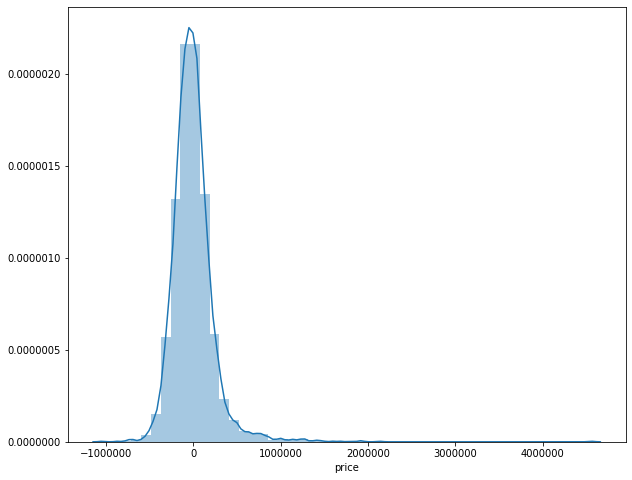

In [83]:
predicted3=lm3.predict(x3_test)
fig=plt.figure(figsize=(10,8))
sns.distplot((y_test-predicted3),bins=50)

In [84]:
print("MAE: ",metrics.mean_absolute_error(y_test,predicted3))
print("MSE: ",metrics.mean_squared_error(y_test,predicted3))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,predicted3))) #if we change random from 50 to 100, model will be better

MAE:  161078.824715876
MSE:  58930807086.66636
RMSE:  242756.68288775565


In [85]:
#try this model
bedrooms=[3]
bathrooms=[4]
sqft_living=[1155]
floors=[2.0]
grade=[9]
dict_predict={"bedrooms":bedrooms,"bathrooms":bathrooms,"sqft_living":sqft_living,"floors":floors,"grade":grade}
df_test=pd.DataFrame(dict_predict)

In [86]:
df_test

bedrooms  bathrooms  sqft_living  floors  grade
0         3          4         1155     2.0      9

In [87]:
lm3.predict(df_test)

array([453025.03997644])